# Imputation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.DataFrame(
    data={
        'gender':np.random.binomial(1, .6, 100),
        'height':np.random.normal(0, 10, 100),
        'noise': np.random.normal(0, 2, 100),
    }
)

df.head()

,gender,height,noise
0,1,-4.052214,1.486000
1,1,-4.975149,-1.775868
2,0,17.352390,-2.114233
3,1,8.767523,-1.702143
4,0,11.934755,0.551394


In [3]:
df = (
    df.assign(
        height = df.height + df.gender.apply(
            lambda g : 150 if g else 180
        ),
        height_with_75_nan = df.height.apply(
            lambda x : x if np.random.binomial(1, .25, 1)[0] else np.nan
        ),
        
    )
)
df['weight'] = df.height + df.noise - 110
df.sample(8)

,gender,height,noise,height_with_75_nan,weight
22,1,150.926231,-0.328869,NaN,40.597361
56,0,188.917449,0.996089,NaN,79.913538
83,1,169.101681,-0.161834,NaN,58.939847
3,1,158.767523,-1.702143,NaN,47.065381
11,0,187.094170,0.811398,7.09417,77.905567
38,0,191.606208,3.317573,NaN,84.923781
16,0,184.772273,-0.200589,NaN,74.571685
29,0,176.596555,1.863342,NaN,68.459897


In [4]:
df.isna().sum()

gender                 0
height                 0
noise                  0
height_with_75_nan    72
weight                 0
dtype: int64

## Setting missing values to 0

In [5]:
df['height_75_zero_imputed'] = df.height_with_75_nan.fillna(0)

In [6]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

X, y = df[['height_75_zero_imputed']], df.weight
reg = Ridge()
reg.fit(X, y)
mean_squared_error(y, reg.predict(X))

263.1929129308967

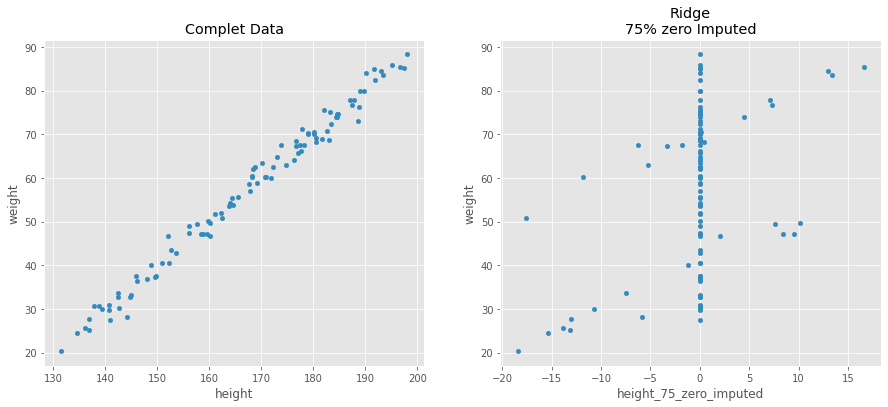

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

df.plot(
    title='Complet Data',
    kind='scatter',
    x='height',
    y='weight',
    ax=axs[0]
)

df.plot(
    title='Ridge\n75% zero Imputed',
    kind='scatter',
    x='height_75_zero_imputed',
    y='weight',
    ax=axs[1]
)

In [8]:
df2 = df.copy()
df2.head()

,gender,height,noise,height_with_75_nan,weight,height_75_zero_imputed
0,1,145.947786,1.486000,NaN,37.433786,0.0
1,1,145.024851,-1.775868,NaN,33.248983,0.0
2,0,197.352390,-2.114233,NaN,85.238157,0.0
3,1,158.767523,-1.702143,NaN,47.065381,0.0
4,0,191.934755,0.551394,NaN,82.486149,0.0


In [9]:
df2.height_75_zero_imputed = df2.height_75_zero_imputed.replace(0, -1)
df2.head()

,gender,height,noise,height_with_75_nan,weight,height_75_zero_imputed
0,1,145.947786,1.486000,NaN,37.433786,-1.0
1,1,145.024851,-1.775868,NaN,33.248983,-1.0
2,0,197.352390,-2.114233,NaN,85.238157,-1.0
3,1,158.767523,-1.702143,NaN,47.065381,-1.0
4,0,191.934755,0.551394,NaN,82.486149,-1.0


### Decision Tree model

In [10]:
from sklearn.tree import DecisionTreeRegressor

X_dt = df2[['height_75_zero_imputed']]

dt = DecisionTreeRegressor()
dt.fit(X_dt, y)
mean_squared_error(y, dt.predict(X_dt))

200.95825546896512

## Setting missing values to the mean

In [11]:
df.head()

,gender,height,noise,height_with_75_nan,weight,height_75_zero_imputed
0,1,145.947786,1.486000,NaN,37.433786,0.0
1,1,145.024851,-1.775868,NaN,33.248983,0.0
2,0,197.352390,-2.114233,NaN,85.238157,0.0
3,1,158.767523,-1.702143,NaN,47.065381,0.0
4,0,191.934755,0.551394,NaN,82.486149,0.0


In [12]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

df['height_75_mean_imputed'] = imputer.fit_transform(df[['height_with_75_nan']])
df.head()

,gender,height,noise,height_with_75_nan,weight,height_75_zero_imputed,height_75_mean_imputed
0,1,145.947786,1.486000,NaN,37.433786,0.0,-1.60549
1,1,145.024851,-1.775868,NaN,33.248983,0.0,-1.60549
2,0,197.352390,-2.114233,NaN,85.238157,0.0,-1.60549
3,1,158.767523,-1.702143,NaN,47.065381,0.0,-1.60549
4,0,191.934755,0.551394,NaN,82.486149,0.0,-1.60549


In [13]:
X, y = df[['height_75_mean_imputed']], df.weight
reg = Ridge()
reg.fit(X, y)
mean_squared_error(y, reg.predict(X))

266.98262937204055

## decision tree mean imputer

In [14]:
df2['height_75_mean_imputed'] = imputer.fit_transform(df2[['height_with_75_nan']])
df2.head()

,gender,height,noise,height_with_75_nan,weight,height_75_zero_imputed,height_75_mean_imputed
0,1,145.947786,1.486000,NaN,37.433786,-1.0,-1.60549
1,1,145.024851,-1.775868,NaN,33.248983,-1.0,-1.60549
2,0,197.352390,-2.114233,NaN,85.238157,-1.0,-1.60549
3,1,158.767523,-1.702143,NaN,47.065381,-1.0,-1.60549
4,0,191.934755,0.551394,NaN,82.486149,-1.0,-1.60549


In [15]:
dt = DecisionTreeRegressor()
X_dt, y = df2[['height_75_mean_imputed']], df.weight
dt.fit(X, y)
mean_squared_error(y, dt.predict(X))

200.95825546896515

## Comparing the effect of imputing strategies

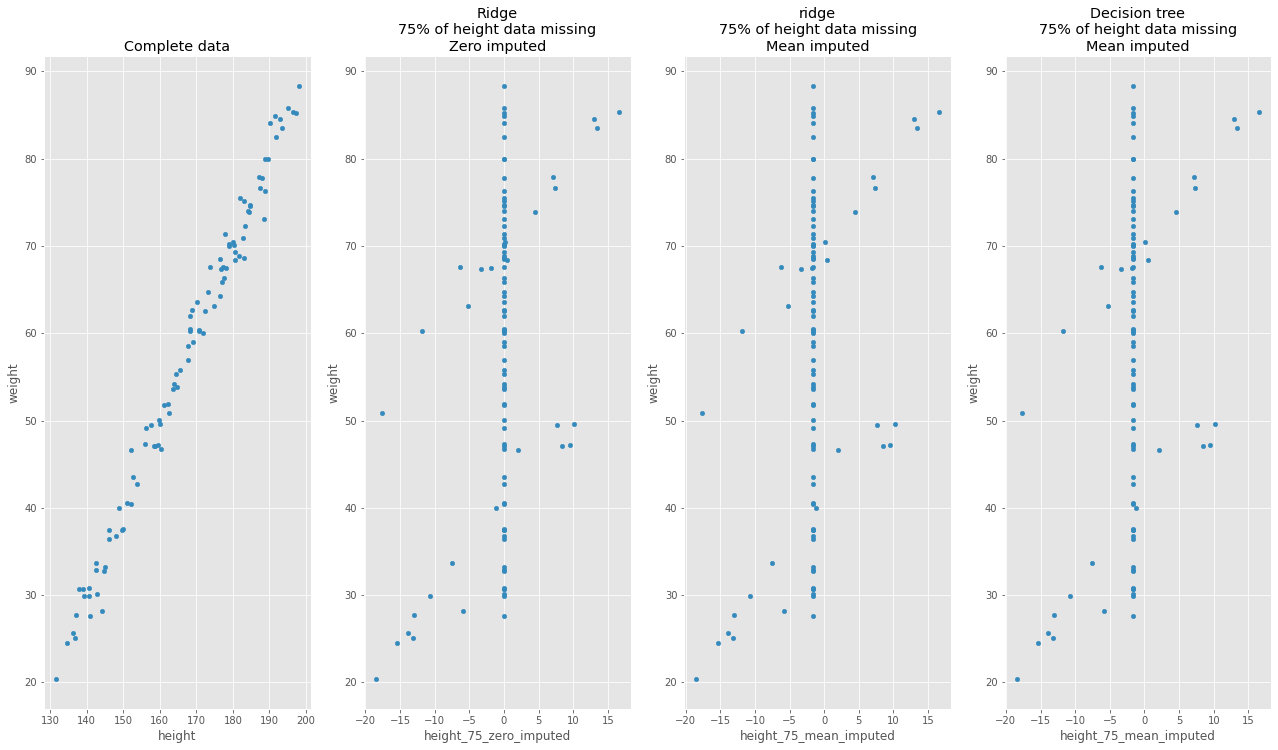

In [16]:
fig, axs = plt.subplots(1, 4, figsize=(22, 12))

df.plot(
    title='Complete data',
    kind='scatter',
    x='height',
    y='weight',
    ax=axs[0]
)

df.plot(
    title='Ridge\n75% of height data missing\nZero imputed',
    kind='scatter',
    x='height_75_zero_imputed',
    y='weight',
    ax=axs[1]
)


df.plot(
    title='ridge\n75% of height data missing\nMean imputed',
    kind='scatter',
    x='height_75_mean_imputed',
    y='weight',
    ax=axs[2]
)

df2.plot(
    title='Decision tree\n75% of height data missing\nMean imputed',
    kind='scatter',
    x='height_75_mean_imputed',
    y='weight',
    ax=axs[3]
)

## Using Iterative Imputer


In [17]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

df['height_75_iterative_imputed'] = -99
imp = IterativeImputer(missing_values=np.nan)
df['height_75_iterative_imputed'] = imp.fit_transform(df[['height_with_75_nan', 'gender']])

df.head()

,gender,height,noise,height_with_75_nan,weight,height_75_zero_imputed,height_75_mean_imputed,height_75_iterative_imputed
0,1,145.947786,1.486000,NaN,37.433786,0.0,-1.60549,-3.123010
1,1,145.024851,-1.775868,NaN,33.248983,0.0,-1.60549,-3.123010
2,0,197.352390,-2.114233,NaN,85.238157,0.0,-1.60549,-0.087969
3,1,158.767523,-1.702143,NaN,47.065381,0.0,-1.60549,-3.123010
4,0,191.934755,0.551394,NaN,82.486149,0.0,-1.60549,-0.087969


In [18]:
X, y = df[['height_75_iterative_imputed']], df.weight
reg = Ridge()
reg.fit(X, y)
mean_squared_error(y, reg.predict(X))

222.30631239298546